# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

### Importe o dataset

In [8]:
dados = pd.read_csv('dados_projeto.csv', sep = ';')

### Visualize o conteúdo do DataFrame

In [9]:
dados.shape

(365, 2)

In [10]:
dados.head(10)

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82
5,28218,23.78
6,29732,24.00
7,28397,24.90
8,24886,28.20
9,37937,26.76


### Obtenha e avalie as estatísticas descritivas dos dados

In [11]:
dados.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

<AxesSubplot:title={'center':'Temperatura Média'}, xlabel='Celsius'>

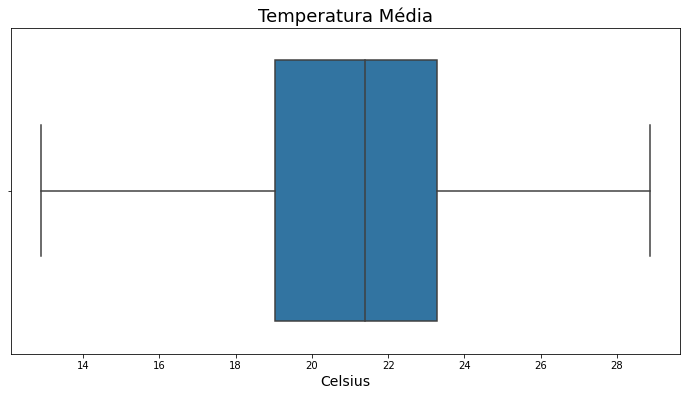

In [12]:
ax = sns.boxplot(x = dados.X, data = dados)
ax.figure.set_size_inches(12, 6)
ax.set_title('Temperatura Média', fontsize=18)
ax.set_xlabel('Celsius', fontsize=14)
ax

<AxesSubplot:title={'center':'Quantidade de Cerveja Consumida'}, xlabel='Litros'>

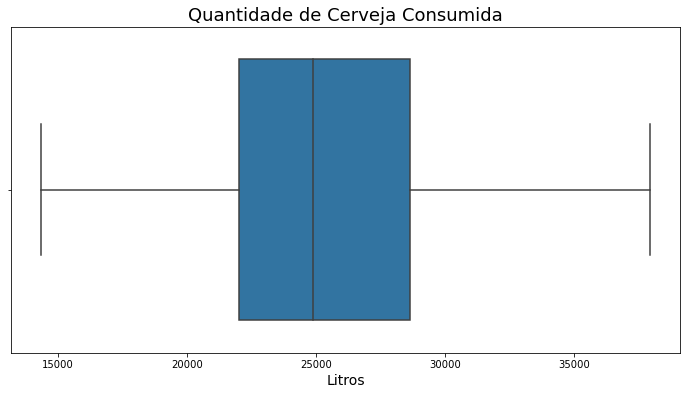

In [13]:
ax = sns.boxplot(x = dados.Y, data = dados)
ax.figure.set_size_inches(12, 6)
ax.set_title('Quantidade de Cerveja Consumida', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

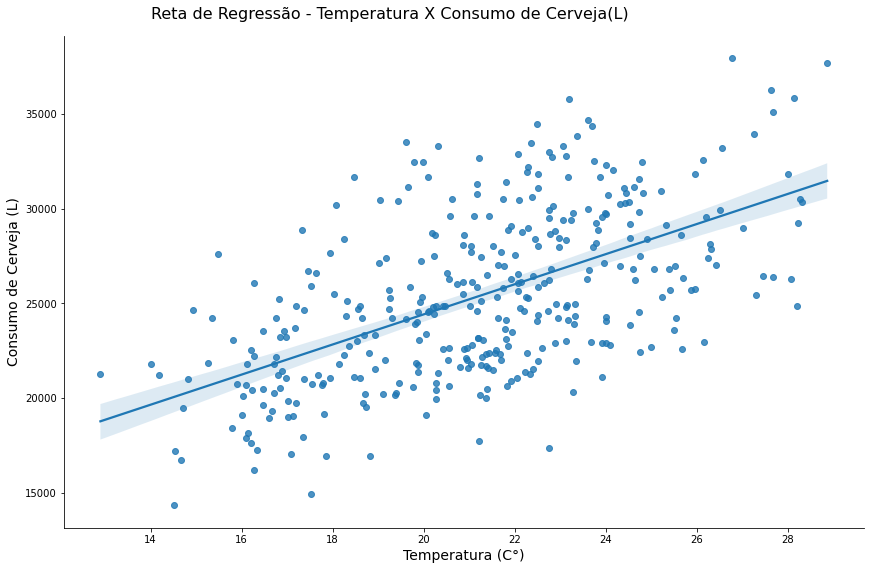

In [14]:
ax = sns.lmplot(x="X", y="Y", data=dados)
ax.fig.set_size_inches(14, 8)
ax.fig.suptitle('Reta de Regressão - Temperatura X Consumo de Cerveja(L)', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura (C°)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (L)", fontsize=14)
ax

### <font color='red'>Utilizando a matriz de correlação</font>

In [15]:
dados.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Sim, porém não é uma correlação forte.

É possível quantificar a intensidade dessa relação?

Resp.: Sim

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Não

### Prepare os dados para estimar um modelo de regressão linear simples

In [16]:
Y = dados.Y
X = sm.add_constant(dados.X)

### Estime o modelo de regressão linear simples

In [17]:
resultado_regressao = sm.OLS(Y, X, missing = 'drop').fit()

### Visualize o resultado da regressão

In [18]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           1.87e-33
Time:                        12:44:45   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtenha o $Y$ previsto

In [19]:
dados['Y_previsto'] = resultado_regressao.predict()
dados.head(10)

,Y,X,Y_previsto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315
5,28218,23.78,27431.214014
6,29732,24.00,27606.088172
7,28397,24.90,28321.482455
8,24886,28.20,30944.594828
9,37937,26.76,29799.963974


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [30]:
print(f'O Consumo de cerveja para um dia com temperatura de 42°C seria de: {(resultado_regressao.predict([1, 42])[0]).round(2)} Litros')

O Consumo de cerveja para um dia com temperatura de 42°C seria de: 41913.97 Litros


### Obtenha os resíduos da regressão

In [21]:
dados['Residuos'] = resultado_regressao.resid
dados.head(10)

,Y,X,Y_previsto,Residuos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685
5,28218,23.78,27431.214014,786.785986
6,29732,24.00,27606.088172,2125.911828
7,28397,24.90,28321.482455,75.517545
8,24886,28.20,30944.594828,-6058.594828
9,37937,26.76,29799.963974,8137.036026


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

<AxesSubplot:title={'center':'Resíduos vs Y_Previsto'}, xlabel='Y_Previsto', ylabel='Resíduos'>

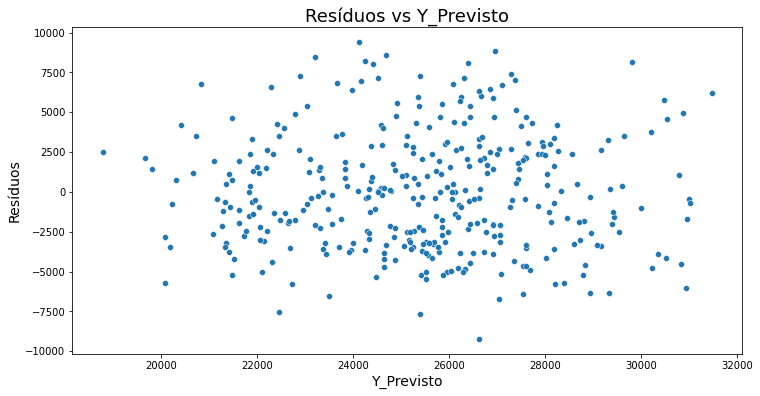

In [22]:
ax = sns.scatterplot(x=dados.Y_previsto, y=dados.Residuos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Y_Previsto', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

### Obtenha o QQPlot dos resíduos

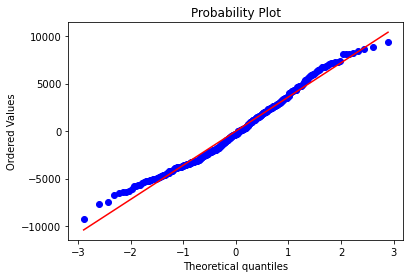

In [23]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

(_, (_, _, _)) = probplot(dados.Residuos, plot = plt)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

R: Os resíduos apresentam linearidade e aproximação com a reta, com uma maior dispersão nas pontas

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [24]:
SQR = resultado_regressao.ess

In [25]:
SQE = resultado_regressao.ssr

In [26]:
SQT = SQR + SQE

In [27]:
R2 = SQR / SQT

In [28]:
R2

0.3301820493324323

In [29]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           1.87e-33
Time:                        12:44:46   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0